In [131]:
import numpy as np
import pandas as pd
import openpyxl as xl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, f_oneway
from sklearn.cluster import KMeans
import pandas as pd

In [132]:
# Creating a dataframe
df = pd.read_excel('data_telecommunications.xlsx')

In [133]:
# Exploring the dataset
df.head()

,id,may,august
0,1,34.92,37.21
1,2,53.77,56.89
2,3,50.82,54.10
3,4,41.97,45.25
4,5,44.43,47.87


# Data cleaning

In [134]:
# Count the number of rows in the dataset, it should be 500
print("Total rows:\n", df.shape[0])

Total rows:
 500


In [135]:
# Check for duplicate IDs
print("Duplicate IDs:", df[df.duplicated(['id'], keep=False)]['id'].unique()) 

Duplicate IDs: []


In [136]:
# Explore missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 id        0
may       1
august    0
dtype: int64


In [137]:
# Since the missing value is only one and we cannot recover the data, we will remove it
df = df.dropna()

print("Total rows:\n", df.shape[0])
print("\nMissing values:\n", df.isnull().sum())

Total rows:
 499

Missing values:
 id        0
may       0
august    0
dtype: int64


In [138]:
# Check for data types
print("Data types:\n", df.dtypes)

Data types:
 id          int64
may       float64
august    float64
dtype: object


In [139]:
# Check there are no values below 0
print(df[(df['may'] < 0) | (df['august'] < 0)])

Empty DataFrame
Columns: [id, may, august]
Index: []


# Data Explotarion

In [140]:
# Descriptive statistics
print(df.describe())

               id         may      august
count  499.000000  499.000000  499.000000
mean   250.078156   46.691222   49.256032
std    144.318270    8.248403    8.917068
min      1.000000   22.470000   24.010000
25%    125.500000   41.300000   43.665000
50%    250.000000   46.560000   49.510000
75%    374.500000   51.920000   55.120000
max    500.000000   69.840000   79.990000


In [141]:
# Check for outliers

Q1 = df['may'].quantile(0.25)
Q3 = df['may'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['may'] < (Q1 - 1.5 * IQR)) | (df['may'] > (Q3 + 1.5 * IQR))]
print("\nOutliers in 'may':\n", outliers) 

Q1 = df['august'].quantile(0.25)
Q3 = df['august'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['august'] < (Q1 - 1.5 * IQR)) | (df['august'] > (Q3 + 1.5 * IQR))]
print("\nOutliers in 'august':\n", outliers) 


Outliers in 'may':
       id    may  august
16    17  69.84   72.95
142  143  69.47   61.98
277  278  22.47   54.75
313  314  68.35   43.13
392  393  24.16   53.10

Outliers in 'august':
       id    may  august
16    17  69.84   72.95
31    32  63.61   72.79
86    87  67.21   73.77
153  154  42.63   75.78
286  287  37.74   24.01
298  299  38.59   24.95
389  390  32.69   25.55
478  479  54.79   79.99


The 'outliers' seem to be reasonable values, therefore we will keep them.

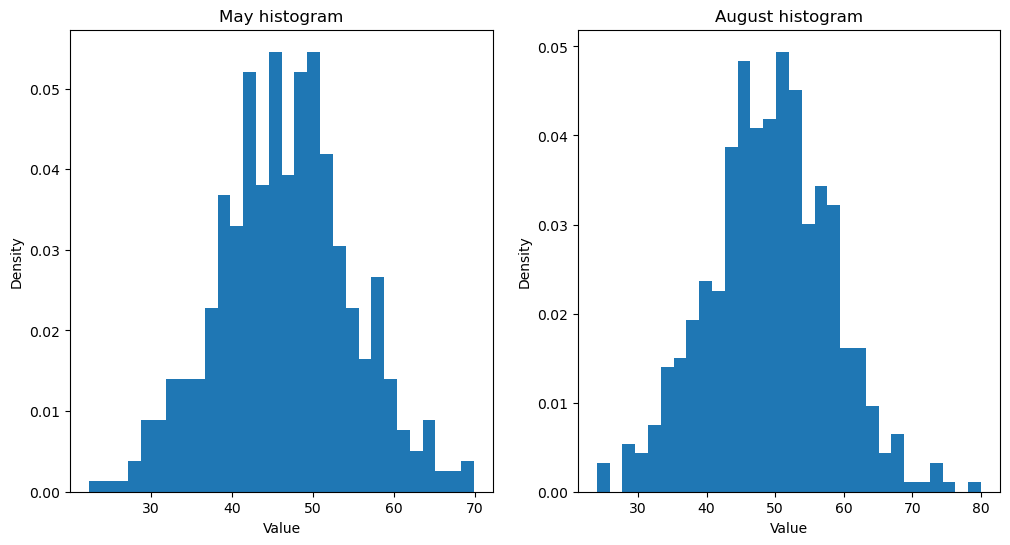

In [142]:
# Crear los histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['may'], bins=30, density=True)
plt.title('May histogram')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(df['august'], bins=30, density=True)
plt.title('August histogram')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

Both months seem to have a normal distribution. We will confirm it with the Shapiro test.

In [143]:
# Comprobar normalidad (Shapiro-Wilk)
shapiro_may = shapiro(df['may'])
shapiro_aug = shapiro(df['august'])
print("Shapiro test - May: p-value= ", round(shapiro_may.pvalue,2))
print("Shapiro test - August: p-value= ", round(shapiro_aug.pvalue,2))

alpha = 0.05

# Conclusion

if shapiro_may.pvalue > alpha:
    print(f'May data follow a normal distribution with 95% confidence.')
else:
    print(f'May data does not follow a normal distribution with 95% confidence.')

# Conclusion
if shapiro_aug.pvalue > alpha:
    print(f'August data follow a normal distribution with 95% confidence.')
else:
    print(f'August data does not follow a normal distribution with 95% confidence.')

Shapiro test - May: p-value=  0.79
Shapiro test - August: p-value=  0.74
May data follow a normal distribution with 95% confidence.
August data follow a normal distribution with 95% confidence.


# Paired samples T-test

In [144]:
# Mean calculation
print('May mean:', round(df['may'].mean(),2))
print('August mean:', round(df['august'].mean(),2))

May mean: 46.69
August mean: 49.26


In [145]:
# Difference
df['diff'] = df['august'] - df['may']
df.head()

,id,may,august,diff
0,1,34.92,37.21,2.29
1,2,53.77,56.89,3.12
2,3,50.82,54.10,3.28
3,4,41.97,45.25,3.28
4,5,44.43,47.87,3.44


In [146]:
# Paired samples T-test
t_statistic, p_value = stats.ttest_1samp(df['diff'], 0)
p_value = round(p_value,2)

print('T statistic:', t_statistic)
print('P-value:', p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print(rf'Null hypothesis rejected. There is a significant difference between the means with 95% confidence.')
else:
    print('Null hypothesis cannot be rejected. There is insufficient evidence to conclude that there is a difference.')

T statistic: 5.910704181002331
P-value: 0.0
Null hypothesis rejected. There is a significant difference between the means with 95% confidence.


We can conclude that the promotion was succefull and the revenue of the company increased.

# Customer segmentation - clustering

c:\Users\juanp\anaconda3\envs\data_sc_practice\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanp\anaconda3\envs\data_sc_practice\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanp\anaconda3\envs\data_sc_practice\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanp\anaconda3\envs\data_sc_practice\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

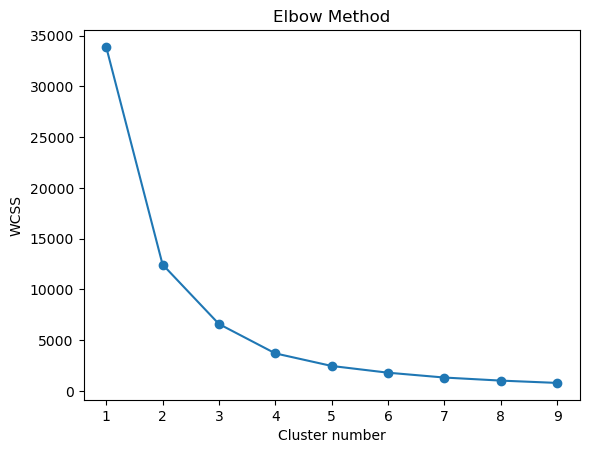

In [147]:
# Select columns
X = df[['may']].values

# Determine optimal clusters with K-means
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters appears to be 4.

In [148]:
# Apply K-means with optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans =  kmeans.fit_predict(X)

# Add a new column to the dataframe with labels
df['cluster'] = y_kmeans



c:\Users\juanp\anaconda3\envs\data_sc_practice\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [149]:
# Obtain the limits of the clusters
for i in range(kmeans.n_clusters):
    cluster_data = df[df['cluster'] == i]
    print(f"Cluster {i}:")
    print(f"Lower limit: {cluster_data['may'].min()}")
    print(f"Superior limit: {cluster_data['may'].max()}")

Cluster 0:
Lower limit: 37.69
Superior limit: 46.12
Cluster 1:
Lower limit: 54.96
Superior limit: 69.84
Cluster 2:
Lower limit: 46.23
Superior limit: 54.84
Cluster 3:
Lower limit: 22.47
Superior limit: 37.41


In [150]:
# Since the clusters are not ordered, name names have to be updated
mapping = {0: 'moderate', 1: 'very high', 2: 'high', 3: 'low'}
df['cluster'] = df['cluster'].map(mapping)

print(df.head())

   id    may  august  diff   cluster
0   1  34.92   37.21  2.29       low
1   2  53.77   56.89  3.12      high
2   3  50.82   54.10  3.28      high
3   4  41.97   45.25  3.28  moderate
4   5  44.43   47.87  3.44  moderate


In [151]:
# Count observations per cluster
cluster_count = df['cluster'].value_counts(ascending=False)
print(cluster_count)

cluster
high         182
moderate     180
very high     77
low           60
Name: count, dtype: int64


In [152]:
# Group data by clusters
grouped = df.groupby('cluster')

# Perform Wilcoxon test for each cluster
for name, group in grouped:
    statistic, pvalue = stats.wilcoxon(group['may'], group['august'])
    print(f"Monthly spending group: {name}")
    print('Statistic:', statistic)
    print('p-value:', pvalue)
    print()

Categoría: high
Statistic: 6563.5
p-value: 0.01784947898205929

Categoría: low
Statistic: 51.0
p-value: 3.0737615314033535e-10

Categoría: moderate
Statistic: 2811.5
p-value: 2.559411007211024e-14

Categoría: very high
Statistic: 516.0
p-value: 5.619832597286353e-07



The Wilcoxon signed-rank test revealed statistically significant differences between May and August monthly bills for all segments at a significance level of 0.05.

# Export Dataframe

In [153]:
df.to_excel('df_telco_powerbi.xlsx', index=False)